# Case Study

### Introduction

A mobile shopping platform is one of the best practices of creating a new business model based on big data and CRM technologies. This platform knows customers' preferences, shopping habits, even the number of children they have, the town their parents live, the activities they do in leisure times etc. This enables the platform to offer a personalized experience with customized campaigns designed for identified micro and macro segments based on customers' lifestyle and preferences through their transactions, without asking any questions. <br/>

Data science is the heart of this platform to enhance a rich and customized reach to its each customer. Mass amount of data is collected from online and offline sources about each customer and data science team works on utilizing this data in an insightful manner to be used in identifying shopping behaviors, motivations and needs of each customer on the path of acquisition, retention and growth models. <br/>


We prepared this notebook to test the knowledge of our fellow candidates. Good luck to all of you !!

|   cid |   month |   spending |   transaction |
|------:|--------:|-----------:|--------------:|
|     1 |       3 |      52.57 |            27 |
|     1 |       4 |      76.98 |            24 |
|     1 |       7 |      66.42 |            26 |
|     1 |       8 |      54.54 |            26 |
|     1 |       9 |     128.21 |            27 |

This is a sample transaction data of our customers:

- **cid**: Customer Id column represents the unique id assigned to each customer
- **month**: Month column represents the month of the transactions
- **spending**: Spending column represents the total paid amount within the month
- **transaction**: Transaction column represents the total number of transactions within the month

**Feel free to add as many cell you need while solving the question and add comments explaining your answer.**

## Question 1

#### Data importing & wrangling
1. Import the necessary packages and functions.
2. Read the csv data.
3. Write some code to explore the dataset. (row numbers, data types, etc.)
4. Assess data visually as well as programmatically using pandas for quality and tidiness issues. 

In [2]:
# 1.Import all packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
import statistics
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
# 2.Gathering the data
df_ = pd.read_csv(r'C:\Users\Yaren Coruh\python-data\data.csv')
df = df_.copy()
df

,cid,month,spending,transaction
0,1,3,52.57000,27
1,1,4,76.98000,24
2,1,7,66.42000,26
3,1,8,54.54000,26
4,1,9,128.21000,27
...,...,...,...,...
74664,10000,7,88.44000,27
74665,10000,8,150.80000,25
74666,10000,9,63.82000,24
74667,10000,10,75.96000,41


In [4]:
# 3.Explore the data
def check_df(dataframe, head=5):
    print("--------------------- SHAPE ---------------------")
    print(dataframe.shape)

    print("---------------------- TYPES --------------------")
    print(dataframe.dtypes)

    print("--------------------- HEAD ----------------------")
    print(dataframe.head(head))

    print("--------------------- QUANTILES ---------------------")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

--------------------- SHAPE ---------------------
(74669, 4)
---------------------- TYPES --------------------
cid              int64
month            int64
spending       float64
transaction      int64
dtype: object
--------------------- HEAD ----------------------
   cid  month  spending  transaction
0    1      3  52.57000           27
1    1      4  76.98000           24
2    1      7  66.42000           26
3    1      8  54.54000           26
4    1      9 128.21000           27
--------------------- QUANTILES ---------------------
             0.00000   0.05000    0.50000    0.95000    0.99000     1.00000
cid          1.00000 502.00000 5015.00000 9503.00000 9899.00000 10000.00000
month        1.00000   1.00000    6.00000   12.00000   12.00000    12.00000
spending    25.92000  38.01000   79.49000  257.16600  495.80760  3512.16000
transaction  2.00000  17.00000   28.00000   47.00000   62.00000   148.00000


In [7]:
# 4.Check quality

# Drop missing rows
df = df.dropna()
# Reset index for dropped rows
df.reset_index(inplace=True, drop=True)

#### Summarizing the data

We would like you to calculate these values for each customers:
1. **avg_spending:** average spending for each customer
2. **std_spending:** standart deviation of spending for each customer
3. **tot_spending:** total spending for each customer
4. **tot_transaction:** total number of transaction for each customer
5. **most_spending_month:** the month that each customer has the most spending    
6. **most_transaction_month:** the month that each customer has the most transaction
7. Print the results

The output seen as:

|   cid |   avg_spending |   std_spending |   tot_spending |   tot_transaction |   most_spending_month |   most_transaction_month |
|------:|---------------:|---------------:|---------------:|------------------:|----------------------:|-------------------------:|
|     1 |       102.39   |        86.3929 |         716.73 |               185 |                    11 |                       11 |
|     2 |        71.3813 |        48.3853 |         571.05 |               266 |                     1 |                       12 |
|     3 |        86.9167 |        50.4738 |         521.5  |               168 |                     9 |                        9 |
|     4 |        86.3875 |        54.4722 |         345.55 |               101 |                    12 |                       12 |
|     5 |       104.537  |        89.4826 |         627.22 |               169 |                    10 |                        6 |

In [8]:
#  Use this and additional cells
avg_spending = df.groupby("cid").agg({"spending": "mean"})
std_spending = df.groupby("cid").agg({"spending": "std"})
tot_spending = df.groupby("cid").agg({"spending": "sum"})
tot_transaction = df.groupby("cid").agg({"transaction": "sum"})
most_spending_month = df.loc[df.groupby("cid")["spending"].idxmax()][["cid", "month"]].set_index("cid")
most_transaction_month = df.loc[df.groupby("cid")["transaction"].idxmax()][["cid", "month"]].set_index("cid")

In [9]:
df = pd.concat([avg_spending, std_spending, tot_spending, tot_transaction, most_spending_month, most_transaction_month], axis=1,)
df.columns = ['avg_spending', 'std_spending', 'tot_spending', 'tot_transaction', 'most_spending_month', 'most_transaction_month']
df.head(5)

,avg_spending,std_spending,tot_spending,tot_transaction,most_spending_month,most_transaction_month
cid,,,,,,
1,102.39000,86.39289,716.73000,185,11,11
2,71.38125,48.38525,571.05000,266,1,12
3,86.91667,50.47377,521.50000,168,9,9
4,86.38750,54.47219,345.55000,101,12,12
5,104.53667,89.48259,627.22000,169,10,6


#### Data Understanding
1. Plot the histogram for average spending of costomer
2. Calculate mean, mode, median of the distribution (*you should round the values before calculating the mode*)
3. Explain the type of the distributon that describes the pattern in the histogram; justify your answer with mean, mode median (*you can answer this question in the comment*)

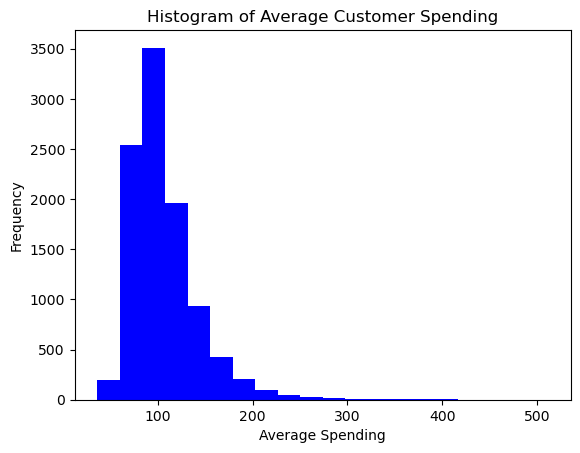

In [10]:
# Plot the histogram for average spending of costomer
# Create the histogram
plt.hist(avg_spending, bins=20, color='blue')

# Add labels and title
plt.xlabel('Average Spending')
plt.ylabel('Frequency')
plt.title('Histogram of Average Customer Spending')

# Display the histogram
plt.show()

In [11]:
#2. Calculate mean, mode, median of the distribution (you should round the values before calculating the mode)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_spending,10000.00000,106.28649,36.82310,36.29500,82.40726,98.44500,120.73292,511.84400
std_spending,9997.00000,73.05443,64.63222,1.70413,36.49054,54.82643,86.42562,1213.75545
tot_spending,10000.00000,793.80835,322.10637,72.59000,578.65500,738.43000,948.31500,4083.04000
tot_transaction,10000.00000,220.24100,56.54082,31.00000,181.00000,219.00000,258.00000,452.00000
most_spending_month,10000.00000,6.46640,3.45153,1.00000,3.00000,6.00000,10.00000,12.00000
most_transaction_month,10000.00000,6.39340,3.44151,1.00000,3.00000,6.00000,9.00000,12.00000


In [14]:
sms.DescrStatsW(df['avg_spending']).tconfint_mean()
# at a 95% confidence level

(105.56467820770283, 107.0082920189927)

In [15]:
median = df.median().T
median

avg_spending              98.44500
std_spending              54.82643
tot_spending             738.43000
tot_transaction          219.00000
most_spending_month        6.00000
most_transaction_month     6.00000
dtype: float64

In [16]:
df = df.round()
mode = df.mode().T
mode.columns = ['mode']
mode

,mode
avg_spending,86.00000
std_spending,43.00000
tot_spending,615.00000
tot_transaction,215.00000
most_spending_month,4.00000
most_transaction_month,4.00000


In [26]:
#3. Explain the type of the distributon that describes the pattern in the histogram; justify your answer with mean, mode median (you can answer this question in the comment)
# This histogram represents a RIGHT-SKEWED NORMAL DISTRIBUTION.
# Characteristics of the distribution are:
  # The order of magnitude should be mode < median < mean.
  # Let's check our own results. For example, let's look at the results for "tot_spending":
    # 615 < 738 < 793
# The order of magnitude should also hold for all other variables.

## Question 2

#### Write a function to replace all spaces in a string with '--' using an array 
Make sure that your function O(n) runtime complexity and do not use built-in replace() function.

<b>Example input</b>: "Mr John Smith, 13" <br>
<b>Example output</b>: "Mr--John--Smith" <br>

You may assume that the array has sufficient space at the end to hold the additional characters, and you are given the true length of the string with the input. Here "13" represents the actual length of the string.

In [18]:
import re

In [19]:
#test your solution here
input_str1 = 'Mr John Smith, 13'
 # expected solution is 'Mr--John--Smith'
input_str1 = 'Woow Data Science, 17'
# expected solution is 'Woow--Data--Science'

In [20]:
input_str1 = re.sub(r'[.,; ]+', '--', input_str1)
print(input_str1)

Woow--Data--Science--17


## Question 3

#### Using regular expression do following operations on **lorem_ipsum_text**:
1. Delete all characters if they are not letters (A-z) and spaces 
2. Find the count of all occurrence of the words that ends with 'us' but not 'llus'
3. Replace all 'ae' with 'æ', (*Don't forget 'Aenean => Ænean'*)
3. Replace all the vowels following by 'll' if the word does not end with that vowel as:
    - a => @ (ex: nullam => null@m, but nulla => nulla)
    - e => 3
    - i => %
    - o => 0
    - u => &

Print the results

In [21]:
import re

lorem_ipsum_text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut sed rhoncus sem, et sagittis tellus. Donec hendrerit sapien ac purus pretium tincidunt. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Pellentesque aliquet, lectus eget finibus aliquet, tortor quam semper justo, sed venenatis nunc lectus a arcu. Vivamus egestas rhoncus dolor, vitae sollicitudin urna. Integer eleifend purus eget porta sagittis. Phasellus malesuada ex nibh, a lobortis tellus tempor hendrerit. Integer tincidunt ante et varius semper. Maecenas quis finibus lacus.
Sed luctus varius nisi, ac pulvinar erat gravida sit amet. Mauris gravida scelerisque nisi vel sollicitudin. In porta diam nec lorem bibendum semper. Cras ut imperdiet sem, vel bibendum risus. Nulla suscipit enim et efficitur interdum. Mauris consectetur porttitor ipsum. Praesent a tortor quis arcu porttitor ullamcorper ac et diam. Pellentesque rhoncus ultrices facilisis. Pellentesque lectus quam, vestibulum in erat non, venenatis vehicula augue. Praesent at viverra est. Integer libero neque, commodo ut ipsum ac, vulputate pharetra libero. Pellentesque in rhoncus magna. In hac habitasse platea dictumst.
Praesent ultrices vel elit vel auctor. Nulla vitae ligula in elit mattis aliquam. Quisque vitae finibus enim. Praesent id maximus mauris. Nunc in pulvinar ligula. Donec condimentum condimentum ipsum aliquet volutpat. Maecenas non porta nunc. Donec risus nulla, pharetra in rhoncus sit amet, efficitur quis urna.
Praesent diam ante, ultrices eget libero sit amet, semper auctor metus. Aliquam sit amet vulputate nibh. Suspendisse potenti. Duis dui ligula, consectetur egestas nibh nec, ullamcorper iaculis turpis. Ut volutpat lacus in leo porta, a lobortis diam placerat. Aenean iaculis, leo at semper fringilla, lectus magna rutrum neque, sollicitudin accumsan est felis at purus. Phasellus et scelerisque libero, ac malesuada nulla. Pellentesque maximus eget erat ac consequat. Ut elementum sapien sed leo aliquam, at ultrices elit venenatis. Duis accumsan finibus imperdiet. Vestibulum ante ipsum primis in faucibus orci luctus et ultrices posuere cubilia curae;
Nulla augue nunc, pharetra quis tellus sed, egestas luctus mi. Fusce hendrerit sagittis urna eleifend varius. Vestibulum velit magna, aliquam nec tincidunt hendrerit, aliquam non ex. Maecenas ut sem imperdiet, semper metus et, gravida quam. Mauris placerat sed erat sed dapibus. Aliquam a suscipit elit. Fusce non dolor justo. Suspendisse dictum posuere faucibus. Proin pretium ipsum vitae orci sagittis placerat. Nulla hendrerit erat sit amet nunc tristique, quis lacinia enim lobortis. Aenean in pretium augue. Proin posuere purus at nulla ultrices molestie. Morbi et pharetra justo. In vel arcu elit. Nullam at est id odio bibendum iaculis nec dapibus velit.
"""

In [22]:
# Delete all characters that are not letters (A-z) and spaces
lorem_ipsum_text = re.sub(r'[^A-Za-z\s]', '', lorem_ipsum_text)
print(lorem_ipsum_text)

Lorem ipsum dolor sit amet consectetur adipiscing elit Ut sed rhoncus sem et sagittis tellus Donec hendrerit sapien ac purus pretium tincidunt Orci varius natoque penatibus et magnis dis parturient montes nascetur ridiculus mus Pellentesque aliquet lectus eget finibus aliquet tortor quam semper justo sed venenatis nunc lectus a arcu Vivamus egestas rhoncus dolor vitae sollicitudin urna Integer eleifend purus eget porta sagittis Phasellus malesuada ex nibh a lobortis tellus tempor hendrerit Integer tincidunt ante et varius semper Maecenas quis finibus lacus
Sed luctus varius nisi ac pulvinar erat gravida sit amet Mauris gravida scelerisque nisi vel sollicitudin In porta diam nec lorem bibendum semper Cras ut imperdiet sem vel bibendum risus Nulla suscipit enim et efficitur interdum Mauris consectetur porttitor ipsum Praesent a tortor quis arcu porttitor ullamcorper ac et diam Pellentesque rhoncus ultrices facilisis Pellentesque lectus quam vestibulum in erat non venenatis vehicula augue

In [23]:
#Find the count of all occurrence of the words that ends with 'us' but not 'llus'
count = len(re.findall(r'\b(?!llus)\w+us\b', lorem_ipsum_text))
print(count)

45


In [24]:
# Replace all 'ae' with 'æ', (Don't forget 'Aenean => Ænean')
lorem_ipsum_text = re.sub(r'ae', 'æ', lorem_ipsum_text, flags=re.IGNORECASE)
print(lorem_ipsum_text)

Lorem ipsum dolor sit amet consectetur adipiscing elit Ut sed rhoncus sem et sagittis tellus Donec hendrerit sapien ac purus pretium tincidunt Orci varius natoque penatibus et magnis dis parturient montes nascetur ridiculus mus Pellentesque aliquet lectus eget finibus aliquet tortor quam semper justo sed venenatis nunc lectus a arcu Vivamus egestas rhoncus dolor vitæ sollicitudin urna Integer eleifend purus eget porta sagittis Phasellus malesuada ex nibh a lobortis tellus tempor hendrerit Integer tincidunt ante et varius semper Mæcenas quis finibus lacus
Sed luctus varius nisi ac pulvinar erat gravida sit amet Mauris gravida scelerisque nisi vel sollicitudin In porta diam nec lorem bibendum semper Cras ut imperdiet sem vel bibendum risus Nulla suscipit enim et efficitur interdum Mauris consectetur porttitor ipsum Præsent a tortor quis arcu porttitor ullamcorper ac et diam Pellentesque rhoncus ultrices facilisis Pellentesque lectus quam vestibulum in erat non venenatis vehicula augue Pr

In [25]:
#Replace all the vowels following by 'll' if the word does not end with that vowel as:
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])a(?=[^aeiouAEIOU]*\b)', '@', lorem_ipsum_text)
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])e(?=[^aeiouAEIOU]*\b)', '3', lorem_ipsum_text)
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])i(?=[^aeiouAEIOU]*\b)', '%', lorem_ipsum_text)
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])o(?=[^aeiouAEIOU]*\b)', '0', lorem_ipsum_text)
lorem_ipsum_text = re.sub(r'(?<![aeiouAEIOU])u(?=[^aeiouAEIOU]*\b)', '&', lorem_ipsum_text)
print(lorem_ipsum_text)

L0r3m ips&m dol0r s%t am3t consectet&r adipisc%ng el%t Ut s3d rhonc&s s3m 3t sagitt%s tell&s D0n3c hendrer%t sapien @c pur&s pretium tincid&nt Orc% varius natoque penatib&s 3t magn%s d%s parturient m0nt3s nascet&r ridicul&s m&s Pellentesque aliquet lect&s eg3t finib&s aliquet tort0r quam semp3r j&st0 s3d venenat%s n&nc lect&s @ arc& Vivam&s eg3st@s rhonc&s dol0r v%tæ sollicit&d%n &rn@ Integ3r eleif3nd pur&s eg3t p0rt@ sagitt%s Phasell&s malesuad@ 3x n%bh @ lob0rt%s tell&s temp0r hendrer%t Integ3r tincid&nt ant3 3t varius semp3r Mæc3n@s quis finib&s lac&s
S3d luct&s varius nis% @c p&lv%n@r 3r@t grav%d@ s%t am3t Maur%s grav%d@ scelerisque nis% v3l sollicit&d%n In p0rt@ diam n3c l0r3m bibend&m semp3r Cr@s &t imperdiet s3m v3l bibend&m ris&s N&ll@ suscip%t en%m 3t efficit&r interd&m Maur%s consectet&r porttit0r ips&m Præs3nt @ tort0r quis arc& porttit0r ullamc0rp3r @c 3t diam Pellentesque rhonc&s &ltr%c3s facilis%s Pellentesque lect&s quam vestibul&m %n 3r@t n0n venenat%s vehic&l@ augue Pr

## Question 4

You should write your code in **SQL programming language**. Don't forgot that you can not run your code in this notebook.

Consider the "Employee" table below:

| Emp_Id  | Emp_name  | Salary  | Manager_Id  |
|---|---|---|---|
| 10 | Anil  | 50000  |  18 |
| 11 | Vikas  | 75000  |   16 |
| 12 | Nisha | 40000 |  18 |
| 13 | Nidhi  | 60000 | 17  |
| 14 | Priya  | 80000 |  18 |
| 15 | Mohit |  45000 |  18 |
| 16 | Rajesh  | 90000 | -  |
| 17 | Raman  | 55000 | 16  |
| 18 | Santosh  | 65000 |  17 |

Write a query to generate below output:

| Manager_Id  | Manager  | Average_Salary_Under_Manager  |
|---|---|---|
| 16 | Rajesh  | 65000  |
| 17 | Raman  | 62500  |
| 18 | Santosh | 53750 |

In [ ]:
#Write your SQL Code here.    
SELECT   
    Manager_Id,     
    Emp_name AS Manager,     
    AVG(Salary) AS Average_Salary_Under_Manager      
FROM     
    Employee    
WHERE   
    Manager_Id IS NOT NULL AND Manager_Id != '-'    
GROUP BY   
    Manager_Id,   
    Emp_name;  

##  Thank you..